In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import math
import string
import operator

In [ ]:
from scipy.optimize import curve_fit

# Figure 1

In [5]:
#Fitting survivorship curves for captive Frontinella against Austad(1989) data as a function of alpha and kappa
Tmax_C = 217
#kappa = 0.031 #0.031 #0.04
#alpha = 0.0002258 #0.0000075/kappa 
nind = 1000; 
nrepeats = 200 #100


#Data extracted from Austad (1989)
#Laboratory
#plt.plot(0, 1.0,'o')
#plt.plot(30*217/65, 0.8895,'ro')
#plt.plot(40*217/65, 0.592,'ro')
#plt.plot(51*217/65, 0.174,'ro')
#plt.plot(60*217/65, 0.0239,'ro')

X_C = np.round([30*217/65,40*217/65,51*217/65,60*217/65])
X_C = X_C.astype(int) #because the need of having an explicit time unit
Y_C = [0.8895,0.592,0.174,0.0239] #survivorship data extracted from Austad(1989)
Y_C = [nind * i for i in Y_C] #because Y_C is a list
fit_C = []

for alpha in np.arange(0.000216,0.000218,0.0000005): 
    for kappa in np.arange(0.032,0.034,0.001): 
        # Cohort survivorship protected environment
        H1_mut_C = np.zeros((nrepeats,Tmax_C),dtype = int)
        for k in range(nrepeats):
            s = np.ones((Tmax_C,nind),dtype = int); 
            for j in range(1,Tmax_C):
                for i in range(nind):
                    ran = np.random.rand(1)
                    if s[j-1,i] == 1:
                        if ran < alpha*(((1+kappa)**(j+1))-1):
                            s[j,i] = 0
                    if s[j-1,i] == 0:
                        s[j,i] = 0
            H1_mut_C[k,:] = np.sum(s, axis = 1)
        mean_mut_C = np.mean(H1_mut_C,axis = 0)
        
        # Square distance with nearest data point and sum
        sum_square = (mean_mut_C[X_C[0]]-Y_C[0])**2 + (mean_mut_C[X_C[1]]-Y_C[1])**2 + (mean_mut_C[X_C[2]]-Y_C[2])**2 + (mean_mut_C[X_C[3]]-Y_C[3])**2 
        
        # Store in array
        fit_C.append([alpha,kappa,sum_square])
# Find 10 lowest sum square values and list parameters + values
best_fits = sorted(fit_C, key=operator.itemgetter(2))
print(*best_fits[0:10], sep = "\n")

[0.0002165, 0.033, 1212.6778250000038]
[0.00021800000000000004, 0.033, 1244.2837999999983]
[0.00021750000000000003, 0.033, 1253.6185500000001]
[0.00021700000000000002, 0.033, 1295.1646749999977]
[0.000216, 0.033, 1303.3683000000028]
[0.000216, 0.034, 4037.6612499999987]
[0.0002165, 0.034, 4063.107850000001]
[0.00021700000000000002, 0.034, 4100.1172499999975]
[0.00021750000000000003, 0.034, 4105.747549999998]
[0.00021800000000000004, 0.032, 4299.598650000003]


nrepeats = 200 #new sumsquare
for alpha in np.arange(0.000218,0.00022,0.0000005): 
    for kappa in np.arange(0.032,0.034,0.001): 
[0.000218, 0.033, 1252.6003749999973]
[0.00021850000000000003, 0.033, 1263.5992999999985]
[0.00021900000000000004, 0.033, 1288.3293249999965]
[0.00021950000000000005, 0.033, 1298.9057500000017]
[0.00021900000000000004, 0.032, 3785.631825000001]
[0.00021850000000000003, 0.032, 3867.942449999999]
[0.00021950000000000005, 0.032, 3943.2277500000027]
[0.000218, 0.032, 4296.302575000004]
[0.00021850000000000003, 0.034, 4669.257125000003]
[0.000218, 0.034, 4823.829500000003]


nrepeats = 200 #before revising sum_square
for alpha in np.arange(0.000218,0.000226,0.0000005): 
    for kappa in np.arange(0.029,0.035,0.001):
[0.00022000000000000006, 0.033, 1167.4288500000011]
[0.00022350000000000015, 0.033, 1189.2856999999967]
[0.00022300000000000013, 0.033, 1211.4286749999987]
[0.00022400000000000016, 0.033, 1214.0357500000023]
[0.00022100000000000009, 0.033, 1216.0673499999987]
[0.0002220000000000001, 0.033, 1224.2566000000027]
[0.00022450000000000017, 0.033, 1241.5576749999975]
[0.00022250000000000012, 0.033, 1244.6669500000012]
[0.00021900000000000004, 0.033, 1253.8345749999987]
[0.00021950000000000005, 0.033, 1270.834949999999]

scipy.optimize.curve_fit

scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=- inf, inf, method=None, jac=None, **kwargs)[source]
Use non-linear least squares to fit a function, f, to data.

Assumes ydata = f(xdata, *params) + eps.

Parameters
fcallable
The model function, f(x, …). It must take the independent variable as the first argument and the parameters to fit as separate remaining arguments.
xdataarray_like or object
The independent variable where the data is measured. Should usually be an M-length sequence or an (k,M)-shaped array for functions with k predictors, but can actually be any object.
ydataarray_like
The dependent data, a length M array - nominally f(xdata, ...).
p0array_like, optional
Initial guess for the parameters (length N). If None, then the initial values will all be 1 (if the number of parameters for the function can be determined using introspection, otherwise a ValueError is raised).
sigmaNone or M-length sequence or MxM array, optional
Determines the uncertainty in ydata. If we define residuals as r = ydata - f(xdata, *popt), then the interpretation of sigma depends on its number of dimensions:
A 1-D sigma should contain values of standard deviations of errors in ydata. In this case, the optimized function is chisq = sum((r / sigma) ** 2).
A 2-D sigma should contain the covariance matrix of errors in ydata. In this case, the optimized function is chisq = r.T @ inv(sigma) @ r.
New in version 0.19.
None (default) is equivalent of 1-D sigma filled with ones.
absolute_sigmabool, optional
If True, sigma is used in an absolute sense and the estimated parameter covariance pcov reflects these absolute values.
If False (default), only the relative magnitudes of the sigma values matter. The returned parameter covariance matrix pcov is based on scaling sigma by a constant factor. This constant is set by demanding that the reduced chisq for the optimal parameters popt when using the scaled sigma equals unity. In other words, sigma is scaled to match the sample variance of the residuals after the fit. Default is False. Mathematically, pcov(absolute_sigma=False) = pcov(absolute_sigma=True) * chisq(popt)/(M-N)
check_finitebool, optional
If True, check that the input arrays do not contain nans of infs, and raise a ValueError if they do. Setting this parameter to False may silently produce nonsensical results if the input arrays do contain nans. Default is True.
bounds2-tuple of array_like, optional
Lower and upper bounds on parameters. Defaults to no bounds. Each element of the tuple must be either an array with the length equal to the number of parameters, or a scalar (in which case the bound is taken to be the same for all parameters). Use np.inf with an appropriate sign to disable bounds on all or some parameters.
New in version 0.17.
method{‘lm’, ‘trf’, ‘dogbox’}, optional
Method to use for optimization. See least_squares for more details. Default is ‘lm’ for unconstrained problems and ‘trf’ if bounds are provided. The method ‘lm’ won’t work when the number of observations is less than the number of variables, use ‘trf’ or ‘dogbox’ in this case.
New in version 0.17.
jaccallable, string or None, optional
Function with signature jac(x, ...) which computes the Jacobian matrix of the model function with respect to parameters as a dense array_like structure. It will be scaled according to provided sigma. If None (default), the Jacobian will be estimated numerically. String keywords for ‘trf’ and ‘dogbox’ methods can be used to select a finite difference scheme, see least_squares.
New in version 0.18.
kwargs
Keyword arguments passed to leastsq for method='lm' or least_squares otherwise.
Returns
poptarray
Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.
pcov2-D array
The estimated covariance of popt. The diagonals provide the variance of the parameter estimate. To compute one standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov)).
How the sigma parameter affects the estimated covariance depends on absolute_sigma argument, as described above.
If the Jacobian matrix at the solution doesn’t have a full rank, then ‘lm’ method returns a matrix filled with np.inf, on the other hand ‘trf’ and ‘dogbox’ methods use Moore-Penrose pseudoinverse to compute the covariance matrix.
Raises
ValueError
if either ydata or xdata contain NaNs, or if incompatible options are used.
RuntimeError
if the least-squares minimization fails.
OptimizeWarning
if covariance of the parameters can not be estimated.

In [ ]:
# Trying out scipy fitting algorithm

def func(x, a, b, c):
...     return a * np.exp(-b * x) + c

xdata = np.linspace(0, ??, 100 )# x data empiriocal data
ydata =         #empirical data

popt, pcov = curve_fit(func, xdata, ydata)
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))

#Fitting survivorship curves for captive Frontinella against Austad(1989) data as a function of alpha and kappa
Tmax_C = 217
#kappa = 0.031 #0.031 #0.04
#alpha = 0.0002258 #0.0000075/kappa 
nind = 1000; 
nrepeats = 200 #100


#Data extracted from Austad (1989)
#Laboratory
#plt.plot(0, 1.0,'o')
#plt.plot(30*217/65, 0.8895,'ro')
#plt.plot(40*217/65, 0.592,'ro')
#plt.plot(51*217/65, 0.174,'ro')
#plt.plot(60*217/65, 0.0239,'ro')

X_C = np.round([30*217/65,40*217/65,51*217/65,60*217/65])
X_C = X_C.astype(int) #because the need of having an explicit time unit
Y_C = [0.8895,0.592,0.174,0.0239] #survivorship data extracted from Austad(1989)
Y_C = [nind * i for i in Y_C] #because Y_C is a list
fit_C = []

def func()


    return 


for alpha in np.arange(0.000216,0.000218,0.0000005): 
    for kappa in np.arange(0.032,0.034,0.001): 
        # Cohort survivorship protected environment
        H1_mut_C = np.zeros((nrepeats,Tmax_C),dtype = int)
        for k in range(nrepeats):
            s = np.ones((Tmax_C,nind),dtype = int); 
            for j in range(1,Tmax_C):
                for i in range(nind):
                    ran = np.random.rand(1)
                    if s[j-1,i] == 1:
                        if ran < alpha*(((1+kappa)**(j+1))-1):
                            s[j,i] = 0
                    if s[j-1,i] == 0:
                        s[j,i] = 0
            H1_mut_C[k,:] = np.sum(s, axis = 1)
        mean_mut_C = np.mean(H1_mut_C,axis = 0)
        
        # Square distance with nearest data point and sum
        sum_square = (mean_mut_C[X_C[0]]-Y_C[0])**2 + (mean_mut_C[X_C[1]]-Y_C[1])**2 + (mean_mut_C[X_C[2]]-Y_C[2])**2 + (mean_mut_C[X_C[3]]-Y_C[3])**2 
        
        # Store in array
        fit_C.append([alpha,kappa,sum_square])
# Find 10 lowest sum square values and list parameters + values
best_fits = sorted(fit_C, key=operator.itemgetter(2))
print(*best_fits[0:10], sep = "\n")

In [7]:
#Fitting survivorship curves wild type Frontinella against Austad(1989) data as a function of (1-epsilon)p_wt = prod_wt
#using the the first three data points, assuming that the mutant up to T = 50 has negligible senescence 

Tmax_W = 100
nind = 1000; 
nrepeats = 200 #50 #100

#Data extracted from Austad (1989)
#Wild
#plt.plot(0, 1.0,'bo')
#plt.plot(5*100/30, 0.5498,'bo')
#plt.plot(10*100/30, 0.268,'bo')
#plt.plot(15*100/30, 0.148,'bo')
#plt.plot(20*100/30, 0.05,'bo')
#plt.plot(25*100/30, 0.0016,'bo') NOT INCORPORATED
#plt.plot(30*100/30, 0.0,'bo')

X_W = np.round([5*100/30,10*100/30,15*100/30,20*100/30,30*100/30])
X_W = X_W.astype(int)
Y_W = [0.5498,0.268,0.148,0.05,0.0]
Y_W = [nind * i for i in Y_W]
fit_W = []

for prod_wt in np.arange(0.0378,0.0382,0.000025): 
    # Cohort survivorship protected environment
    H1_mut_W = np.zeros((nrepeats,Tmax_W),dtype = int)
    for k in range(nrepeats):
        s = np.ones((Tmax_W,nind),dtype = int); 
        for j in range(1,Tmax_W):
            for i in range(nind):
                ran = np.random.rand(1)
                if s[j-1,i] == 1:
                    if ran < prod_wt:
                        s[j,i] = 0
                if s[j-1,i] == 0:
                    s[j,i] = 0
        H1_mut_W[k,:] = np.sum(s, axis = 1)
    mean_mut_W = np.mean(H1_mut_W,axis = 0)

    # Square distance with data points and sum
    sum_square = (mean_mut_W[X_W[0]]-Y_W[0])**2 + (mean_mut_W[X_W[1]]-Y_W[1])**2 + (mean_mut_W[X_W[2]]-Y_W[2])**2 #using only the first three points

    # Store in array
    fit_W.append([prod_wt,sum_square])
# Find 10 lowest sum square values and list parameters + values
best_fits = sorted(fit_W, key=operator.itemgetter(1))
print(*best_fits[0:10], sep = "\n")

print()
prod_wt = best_fits[0][0]
for i in range(5):
    epsilon = 0.01*i
    p_wt = prod_wt/(1-epsilon)
    print('epsilon = ',epsilon,'p_wt = ',p_wt)

[0.037924999999999986, 1040.6110249999967]
[0.03787499999999999, 1090.154074999999]
[0.03799999999999998, 1094.8641249999985]
[0.03804999999999997, 1101.6540249999982]
[0.037825, 1107.323524999996]
[0.037849999999999995, 1124.6224249999946]
[0.03797499999999998, 1127.8124249999937]
[0.03789999999999999, 1138.3631249999967]
[0.03814999999999996, 1151.7422499999977]
[0.03809999999999997, 1154.383349999999]

epsilon =  0.0 p_wt =  0.037924999999999986
epsilon =  0.01 p_wt =  0.0383080808080808
epsilon =  0.02 p_wt =  0.03869897959183672
epsilon =  0.03 p_wt =  0.03909793814432989
epsilon =  0.04 p_wt =  0.03950520833333332


nrepats = 200 #new_sum_square
for prod_wt in np.arange(0.0382,0.0386,0.000025): 
[0.0382, 1068.5649249999983]
[0.03844999999999997, 1257.9329499999944]
[0.038224999999999995, 1297.093399999998]
[0.038324999999999984, 1298.3683249999951]
[0.038399999999999976, 1324.7258999999972]
[0.03827499999999999, 1341.809449999998]
[0.03824999999999999, 1364.909099999994]
[0.03829999999999999, 1381.6599499999968]
[0.03842499999999997, 1395.9326249999983]
[0.038499999999999965, 1413.508949999993]

epsilon =  0.0 p_wt =  0.0382
epsilon =  0.01 p_wt =  0.038585858585858585
epsilon =  0.02 p_wt =  0.03897959183673469
epsilon =  0.03 p_wt =  0.039381443298969074
epsilon =  0.04 p_wt =  0.03979166666666666

nrepeats = 200: #old sum_square
for prod_wt in np.arange(0.0385,0.0399,0.000025):
[0.038549999999999994, 513.0852499999967]
[0.038525, 514.4584000000002]
[0.038724999999999975, 516.7200999999975]
[0.03857499999999999, 517.1294749999977]
[0.03877499999999997, 537.9409249999983]
[0.038899999999999955, 555.0572749999999]
[0.038799999999999966, 555.0895249999983]
[0.03869999999999998, 556.5948499999987]
[0.038624999999999986, 562.3281499999996]
[0.038824999999999964, 570.6849999999965]

epsilon =  0.0 p_wt =  0.038549999999999994
epsilon =  0.01 p_wt =  0.03893939393939393
epsilon =  0.02 p_wt =  0.039336734693877544
epsilon =  0.03 p_wt =  0.03974226804123711
epsilon =  0.04 p_wt =  0.04015625

In [307]:
#Testing that the least sum squares values are identical for the epsilon and P_wt combos above
#Assuming negligible senescence for the first three data points, so we use only these for estimation.
Tmax_W = 100
nind = 1000; 
nrepeats_mut = 200


#Data extracted from Austad (1989)
#Wild
#plt.plot(0, 1.0,'bo')
#plt.plot(5*100/30, 0.5498,'bo')
#plt.plot(10*100/30, 0.268,'bo')
#plt.plot(15*100/30, 0.148,'bo')
#plt.plot(20*100/30, 0.05,'bo')
#plt.plot(25*100/30, 0.0016,'bo') NOT INCORPORATED
#plt.plot(30*100/30, 0.0,'bo')

X_W = np.round([5*100/30,10*100/30,15*100/30,20*100/30,30*100/30])
X_W = X_W.astype(int)
Y_W = [0.5498,0.268,0.148,0.05,0.0]
Y_W = [nind * i for i in Y_W]
fit_W = []

for epsilon in np.arange(0.01,0.05,0.01):
    if epsilon == 0.01:
        p_wt = 0.03893939393939393
    if epsilon == 0.02:
        p_wt = 0.039336734693877544
    if epsilon == 0.03:
        p_wt = 0.03974226804123711
    if epsilon == 0.04:
        p_wt = 0.04015625
        
    H1_mut_W = np.zeros((nrepeats_mut,Tmax_W),dtype = int)
    for k in range(nrepeats_mut):
        s = np.ones((Tmax_W,nind),dtype = int); 
        for j in range(1,Tmax_W):
            for i in range(nind):
                ran = np.random.rand(1)
                if s[j-1,i] == 1:
                    if ran < (1-epsilon)*p_wt:
                        s[j,i] = 0
                if s[j-1,i] == 0:
                    s[j,i] = 0
        H1_mut_W[k,:] = np.sum(s, axis = 1)
    mean_mut_W = np.mean(H1_mut_W,axis = 0)
        
    # Square distance with data point and sum
    #sum_square = (mean_mut_W[X_W[0]-1]-Y_W[0])**2 + (mean_mut_W[X_W[1]-1]-Y_W[1])**2 + (mean_mut_W[X_W[2]-1]-Y_W[2])**2 + (mean_mut_W[X_W[3]-1]-Y_W[3])**2 + (mean_mut_W[X_W[4]-1]-Y_W[4])**2
    sum_square = (mean_mut_W[X_W[0]-1]-Y_W[0])**2 + (mean_mut_W[X_W[1]-1]-Y_W[1])**2 + (mean_mut_W[X_W[2]-1]-Y_W[2])**2 

    # Store in array
    fit_W.append([epsilon,p_wt,sum_square])
# Find 10 lowest sum square values and list parameters + values
#best_fits = sorted(fit_W, key=operator.itemgetter(2))
print(*fit_W, sep = "\n")

[0.01, 0.03893939393939393, 551.215449999999]
[0.02, 0.039336734693877544, 469.7346249999987]
[0.03, 0.03974226804123711, 533.268649999998]
[0.04, 0.04015625, 592.6612499999984]


nrepeats = 200:
[0.01, 0.03893939393939393, 551.215449999999]
[0.02, 0.039336734693877544, 469.7346249999987]
[0.03, 0.03974226804123711, 533.268649999998]
[0.04, 0.04015625, 592.6612499999984]

Mean number of mutant individuals in captvity left at Tmax_C:  0.22
Mean number of mutant individuals left at Tmax_W:  17.505
Mean number of wildtype individuals left at Tmax_W:  17.455
Mean number of wildtype individuals left at Tmax_wt:  5.075


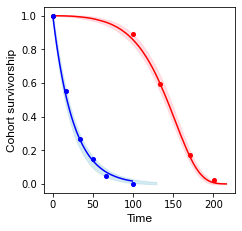

In [308]:
#Calculating survivorship curves for mutant captive Frontinella, mutant wild Frontinella  + stipulated wildtype Frontinella
Tmax_C = 217
Tmax_W = 100
Tmax_WT = 130

alpha = 0.000222 
kappa = 0.033 

nind = 1000; 
nrepeats_mut = 200
p_wt_wt = 0.04015625 #0.0391
p_wt_mut = 0.04015625 #0.0391 
epsilon = 0.04 #0.03 #0.07 #0.04


# Cohort survivorship protected environment
H1_mut_C = np.zeros((nrepeats_mut,Tmax_C),dtype = int)
for k in range(nrepeats_mut):
    s = np.ones((Tmax_C,nind),dtype = int); 
    for j in range(1,Tmax_C):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < alpha*(((1+kappa)**(j+1))-1):
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    H1_mut_C[k,:] = np.sum(s, axis = 1)

mean_mut_C = np.mean(H1_mut_C,axis = 0)

# Cohort survivorship mutant wild
H1_mut_W = np.zeros((nrepeats_mut,Tmax_W),dtype = int)
for k in range(nrepeats_mut):
    s = np.ones((Tmax_W,nind),dtype = int); 
    for j in range(1,Tmax_W):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < (1-epsilon)*p_wt_mut + alpha*(((1+kappa)**(j+1))-1):
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    H1_mut_W[k,:] = np.sum(s, axis = 1)
mean_mut_W = np.mean(H1_mut_W,axis = 0)

# Cohort survivorship stipulated wildtype based on mutant parameter values
# with constant p_wt found by least squares fitting
H1_wt = np.zeros((nrepeats_mut,Tmax_WT),dtype = int); 
for k in range(0,nrepeats_mut):
    s = np.ones((Tmax_WT,nind),dtype = int); 
    for j in range(1,Tmax_WT):
        for i in range(nind):
            ran = np.random.rand(1)
            if (s[j-1,i] == 1):
                if ran < p_wt_wt:
                    s[j,i] = 0
            if (s[j-1,i] == 0):
                s[j,i] = 0
    H1_wt[k,:] = np.sum(s, axis = 1) 
mean_wt = np.mean(H1_wt,axis = 0)

# Recording
print('Mean number of mutant individuals in captvity left at Tmax_C: ',mean_mut_C[Tmax_C-1])
print('Mean number of mutant individuals left at Tmax_W: ',mean_mut_W[Tmax_W-1])
print('Mean number of wildtype individuals left at Tmax_W: ',mean_wt[Tmax_W-1])
print('Mean number of wildtype individuals left at Tmax_wt: ',mean_wt[Tmax_WT-1])

# Normalize + calculate stds
mean_mut_C = mean_mut_C*(1/nind)
std_mut_C = np.std(H1_mut_C*(1/nind),axis = 0)
mean_mut_W = mean_mut_W*(1/nind)
std_mut_W = np.std(H1_mut_W*(1/nind),axis = 0)
mean_wt = mean_wt*(1/nind)
std_wt = np.std(H1_wt*(1/nind),axis = 0)

# Plotting
C1 = np.arange(0,Tmax_C,1,dtype = int)
C2 = np.arange(0,Tmax_mut,1,dtype = int)
C3 = np.arange(0,Tmax_WT,1,dtype = int)

fig1,ax = plt.subplots(figsize=(6,6))
#plt.plot(C1,mean_mut_C,'r-')
#plt.fill_between(range(Tmax_C), mean_mut_C-3.0*std_mut_C, mean_mut_C+3.0*std_mut_C, color='pink', alpha = 0.5)
#plt.plot(C2,mean_mut_W,'b-')
#plt.fill_between(range(Tmax_WT), mean_wt-3.0*std_wt, mean_wt+3.0*std_wt, color = 'lightblue', alpha = 0.5);
ax.plot(C1,mean_mut_C,'r-')
ax.fill_between(range(Tmax_C), mean_mut_C-3.0*std_mut_C, mean_mut_C+3.0*std_mut_C, color='pink', alpha = 0.5)
ax.plot(C2,mean_mut_W,'b-')
#plt.plot(C3,mean_wt,'g-')
ax.fill_between(range(Tmax_WT), mean_wt-3.0*std_wt, mean_wt+3.0*std_wt, color = 'lightblue', alpha = 0.5);

#Data extracted from Austad (1989)
#Laboratory
#plt.plot(0, 1.0,'o')
#plt.plot(30*217/65, 0.8895,'ro')
#plt.plot(40*217/65, 0.592,'ro')
#plt.plot(51*217/65, 0.174,'ro')
#plt.plot(60*217/65, 0.0239,'ro')

X_C = [0,30*217/65,40*217/65,51*217/65,60*217/65]
Y_C = [1.0,0.8895,0.592,0.174,0.0239]
ax.plot(X_C,Y_C,'ro',markersize=4)

X_W = [0,5*100/30,10*100/30,15*100/30,20*100/30,30*100/30]
Y_W = [1.0,0.5498,0.268,0.148,0.05,0.0]
ax.plot(X_W,Y_W,'bo',markersize=4)

#Data extracted from Austad (1989)
#Wild
#plt.plot(0, 1.0,'bo')
#plt.plot(5*100/30, 0.5498,'bo')
#plt.plot(10*100/30, 0.268,'bo')
#plt.plot(15*100/30, 0.148,'bo')
#plt.plot(20*100/30, 0.05,'bo')
#plt.plot(25*100/30, 0.0016,'bo')
#plt.plot(30*100/30, 0.0,'bo')

#plt.xlabel("Time",fontsize = 14)
#plt.ylabel("Cohort survivorship",fontsize = 14);
afont = {'fontname':'Arial'}
ax.set_xlabel("Time",fontsize = 12,**afont)
ax.set_ylabel("Cohort survivorship",fontsize = 12,**afont);

x_size = 10
plt.rc('xtick',labelsize=x_size)
y_size = 10
plt.rc('ytick',labelsize=y_size)

fig.tight_layout()

figure = plt.gcf()
figure.set_size_inches(3.42, 3.42)

plt.savefig('RA_fig1_Frontinella.pdf', dpi = 600, bbox_inches="tight");

In [55]:
# Test of the correspondence between Eq. 8 and the Gompertz hazard function
nind = 1000
nrepeats_mut = 1000
Tmax_C = 217
alpha = 0.000222 
kappa = 0.033 

#Eq. 8
H1_mut_C = np.zeros((nrepeats_mut,Tmax_C),dtype = int)
for k in range(nrepeats_mut):
    s = np.ones((Tmax_C,nind),dtype = int); 
    for j in range(1,Tmax_C):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < alpha*(((1+kappa)**(j+1))-1):
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    H1_mut_C[k,:] = np.sum(s, axis = 1)

mean_mut_C = np.mean(H1_mut_C,axis = 0)
mean_mut_C

array([1.00000e+03, 9.99984e+02, 9.99953e+02, 9.99922e+02, 9.99888e+02,
       9.99835e+02, 9.99781e+02, 9.99722e+02, 9.99661e+02, 9.99597e+02,
       9.99512e+02, 9.99411e+02, 9.99300e+02, 9.99182e+02, 9.99035e+02,
       9.98893e+02, 9.98746e+02, 9.98577e+02, 9.98412e+02, 9.98194e+02,
       9.97989e+02, 9.97748e+02, 9.97482e+02, 9.97227e+02, 9.96951e+02,
       9.96636e+02, 9.96313e+02, 9.95967e+02, 9.95632e+02, 9.95268e+02,
       9.94840e+02, 9.94453e+02, 9.94011e+02, 9.93556e+02, 9.93065e+02,
       9.92567e+02, 9.92034e+02, 9.91511e+02, 9.90933e+02, 9.90368e+02,
       9.89809e+02, 9.89146e+02, 9.88512e+02, 9.87797e+02, 9.87079e+02,
       9.86293e+02, 9.85514e+02, 9.84745e+02, 9.83918e+02, 9.83053e+02,
       9.82121e+02, 9.81139e+02, 9.80148e+02, 9.79119e+02, 9.78028e+02,
       9.76985e+02, 9.75811e+02, 9.74612e+02, 9.73329e+02, 9.71993e+02,
       9.70609e+02, 9.69259e+02, 9.67867e+02, 9.66328e+02, 9.64700e+02,
       9.63165e+02, 9.61504e+02, 9.59714e+02, 9.57819e+02, 9.559

In [58]:
#Gompertz
alpha_G = alpha*(1+kappa)

nind = 1000
nrepeats_mut = 1000
Tmax_C = 217
alpha = 0.000222 
kappa = 0.033 

#Eq. 8
H1_mut_C_G = np.zeros((nrepeats_mut,Tmax_C),dtype = int)
for k in range(nrepeats_mut):
    s = np.ones((Tmax_C,nind),dtype = int); 
    for j in range(1,Tmax_C):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < alpha_G*math.exp(math.log(1+kappa)*j): #-alpha:
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    H1_mut_C_G[k,:] = np.sum(s, axis = 1)

mean_mut_C_G = np.mean(H1_mut_C_G,axis = 0)
mean_mut_C_G

array([1.00000e+03, 9.99806e+02, 9.99564e+02, 9.99322e+02, 9.99067e+02,
       9.98808e+02, 9.98524e+02, 9.98233e+02, 9.97923e+02, 9.97618e+02,
       9.97348e+02, 9.97036e+02, 9.96683e+02, 9.96337e+02, 9.95973e+02,
       9.95594e+02, 9.95217e+02, 9.94786e+02, 9.94394e+02, 9.93984e+02,
       9.93539e+02, 9.93096e+02, 9.92630e+02, 9.92157e+02, 9.91705e+02,
       9.91182e+02, 9.90664e+02, 9.90130e+02, 9.89572e+02, 9.88979e+02,
       9.88375e+02, 9.87767e+02, 9.87132e+02, 9.86442e+02, 9.85746e+02,
       9.85038e+02, 9.84358e+02, 9.83621e+02, 9.82784e+02, 9.82008e+02,
       9.81155e+02, 9.80288e+02, 9.79396e+02, 9.78524e+02, 9.77593e+02,
       9.76589e+02, 9.75547e+02, 9.74555e+02, 9.73523e+02, 9.72417e+02,
       9.71290e+02, 9.70102e+02, 9.68957e+02, 9.67721e+02, 9.66432e+02,
       9.65121e+02, 9.63783e+02, 9.62416e+02, 9.60912e+02, 9.59398e+02,
       9.57844e+02, 9.56290e+02, 9.54674e+02, 9.52985e+02, 9.51210e+02,
       9.49377e+02, 9.47456e+02, 9.45530e+02, 9.43488e+02, 9.413

In [59]:
#output = "{:.7f}".format((mean_mut_C_G-mean_mut_C))
#print(output)
(mean_mut_C_G-mean_mut_C)

array([ 0.0000e+00, -1.7800e-01, -3.8900e-01, -6.0000e-01, -8.2100e-01,
       -1.0270e+00, -1.2570e+00, -1.4890e+00, -1.7380e+00, -1.9790e+00,
       -2.1640e+00, -2.3750e+00, -2.6170e+00, -2.8450e+00, -3.0620e+00,
       -3.2990e+00, -3.5290e+00, -3.7910e+00, -4.0180e+00, -4.2100e+00,
       -4.4500e+00, -4.6520e+00, -4.8520e+00, -5.0700e+00, -5.2460e+00,
       -5.4540e+00, -5.6490e+00, -5.8370e+00, -6.0600e+00, -6.2890e+00,
       -6.4650e+00, -6.6860e+00, -6.8790e+00, -7.1140e+00, -7.3190e+00,
       -7.5290e+00, -7.6760e+00, -7.8900e+00, -8.1490e+00, -8.3600e+00,
       -8.6540e+00, -8.8580e+00, -9.1160e+00, -9.2730e+00, -9.4860e+00,
       -9.7040e+00, -9.9670e+00, -1.0190e+01, -1.0395e+01, -1.0636e+01,
       -1.0831e+01, -1.1037e+01, -1.1191e+01, -1.1398e+01, -1.1596e+01,
       -1.1864e+01, -1.2028e+01, -1.2196e+01, -1.2417e+01, -1.2595e+01,
       -1.2765e+01, -1.2969e+01, -1.3193e+01, -1.3343e+01, -1.3490e+01,
       -1.3788e+01, -1.4048e+01, -1.4184e+01, -1.4331e+01, -1.46

(mean_mut_C_G-mean_mut_C) with -alpha
array([ 0.   , -0.002,  0.003,  0.002, -0.001,  0.009,  0.007,  0.   ,
       -0.018, -0.031, -0.03 , -0.037, -0.04 , -0.043, -0.019, -0.035,
       -0.062, -0.066, -0.064, -0.068, -0.097, -0.064, -0.071, -0.074,
       -0.078, -0.066, -0.034, -0.027, -0.041, -0.039,  0.003,  0.013,
        0.013,  0.01 ,  0.033,  0.056,  0.041,  0.012,  0.004,  0.012,
       -0.063, -0.093, -0.116, -0.128, -0.101, -0.068, -0.088, -0.171,
       -0.165, -0.174, -0.195, -0.19 , -0.212, -0.234, -0.183, -0.296,
       -0.333, -0.324, -0.341, -0.297, -0.221, -0.235, -0.251, -0.2  ,
       -0.072, -0.189, -0.154, -0.138, -0.013, -0.033,  0.037, -0.038,
        0.007,  0.002,  0.084,  0.04 ,  0.045,  0.131,  0.153,  0.165,
        0.253,  0.244,  0.162,  0.195,  0.099,  0.128,  0.249,  0.224,
        0.107, -0.097, -0.138, -0.134, -0.21 , -0.295, -0.241, -0.456,
       -0.28 , -0.229, -0.006,  0.028,  0.116,  0.104,  0.131,  0.057,
        0.169,  0.319,  0.386,  0.506,  0.647,  0.792,  0.743,  0.844,
        0.861,  0.931,  0.884,  0.799,  0.651,  0.557,  0.6  ,  0.744,
        0.739,  0.735,  0.65 ,  0.787,  0.826,  0.755,  0.551,  0.39 ,
        0.347,  0.431,  0.611,  0.639,  0.57 ,  0.378,  0.548,  0.785,
        0.953,  0.878,  0.813,  0.694,  0.864,  0.765,  0.534,  0.521,
        0.401,  0.457,  0.53 ,  0.595,  0.644,  0.681,  0.687,  0.594,
        0.635,  0.561,  0.245,  0.294,  0.395,  0.506,  0.756,  0.83 ,
        0.83 ,  0.727,  0.6  ,  0.62 ,  0.672,  0.473,  0.386,  0.22 ,
        0.354,  0.279,  0.459,  0.372,  0.202, -0.135, -0.166, -0.048,
        0.156,  0.323,  0.427,  0.279,  0.245,  0.176, -0.004, -0.087,
       -0.121, -0.097,  0.001, -0.091, -0.05 , -0.027, -0.137, -0.151,
       -0.181, -0.082, -0.014,  0.005, -0.012, -0.081, -0.095, -0.114,
       -0.087, -0.059, -0.017,  0.027,  0.066,  0.08 ,  0.089,  0.088,
        0.039,  0.048,  0.063,  0.045,  0.029,  0.017,  0.021,  0.013,
        0.008])
        
 without -alpha
 
array([ 0.0000e+00, -1.7800e-01, -3.8900e-01, -6.0000e-01, -8.2100e-01,
       -1.0270e+00, -1.2570e+00, -1.4890e+00, -1.7380e+00, -1.9790e+00,
       -2.1640e+00, -2.3750e+00, -2.6170e+00, -2.8450e+00, -3.0620e+00,
       -3.2990e+00, -3.5290e+00, -3.7910e+00, -4.0180e+00, -4.2100e+00,
       -4.4500e+00, -4.6520e+00, -4.8520e+00, -5.0700e+00, -5.2460e+00,
       -5.4540e+00, -5.6490e+00, -5.8370e+00, -6.0600e+00, -6.2890e+00,
       -6.4650e+00, -6.6860e+00, -6.8790e+00, -7.1140e+00, -7.3190e+00,
       -7.5290e+00, -7.6760e+00, -7.8900e+00, -8.1490e+00, -8.3600e+00,
       -8.6540e+00, -8.8580e+00, -9.1160e+00, -9.2730e+00, -9.4860e+00,
       -9.7040e+00, -9.9670e+00, -1.0190e+01, -1.0395e+01, -1.0636e+01,
       -1.0831e+01, -1.1037e+01, -1.1191e+01, -1.1398e+01, -1.1596e+01,
       -1.1864e+01, -1.2028e+01, -1.2196e+01, -1.2417e+01, -1.2595e+01,
       -1.2765e+01, -1.2969e+01, -1.3193e+01, -1.3343e+01, -1.3490e+01,
       -1.3788e+01, -1.4048e+01, -1.4184e+01, -1.4331e+01, -1.4601e+01,
       -1.4728e+01, -1.4886e+01, -1.4992e+01, -1.5202e+01, -1.5384e+01,
       -1.5540e+01, -1.5846e+01, -1.6041e+01, -1.6067e+01, -1.6142e+01,
       -1.6223e+01, -1.6290e+01, -1.6566e+01, -1.6692e+01, -1.6773e+01,
       -1.6950e+01, -1.7003e+01, -1.7141e+01, -1.7244e+01, -1.7492e+01,
       -1.7627e+01, -1.7769e+01, -1.8055e+01, -1.8137e+01, -1.8276e+01,
       -1.8459e+01, -1.8405e+01, -1.8443e+01, -1.8313e+01, -1.8409e+01,
       -1.8315e+01, -1.8286e+01, -1.8319e+01, -1.8473e+01, -1.8512e+01,
       -1.8404e+01, -1.8452e+01, -1.8658e+01, -1.8536e+01, -1.8513e+01,
       -1.8410e+01, -1.8179e+01, -1.8017e+01, -1.8231e+01, -1.8351e+01,
       -1.8393e+01, -1.8655e+01, -1.8452e+01, -1.8419e+01, -1.8306e+01,
       -1.8258e+01, -1.8197e+01, -1.8113e+01, -1.8072e+01, -1.8080e+01,
       -1.8005e+01, -1.7872e+01, -1.8136e+01, -1.7929e+01, -1.7739e+01,
       -1.7570e+01, -1.7425e+01, -1.7347e+01, -1.7016e+01, -1.6597e+01,
       -1.6341e+01, -1.6287e+01, -1.6030e+01, -1.5628e+01, -1.5655e+01,
       -1.5316e+01, -1.5071e+01, -1.4682e+01, -1.4189e+01, -1.4026e+01,
       -1.3763e+01, -1.3404e+01, -1.3134e+01, -1.2833e+01, -1.2559e+01,
       -1.2142e+01, -1.1861e+01, -1.1656e+01, -1.1419e+01, -1.1279e+01,
       -1.0899e+01, -1.0584e+01, -1.0238e+01, -9.9150e+00, -9.5730e+00,
       -9.3140e+00, -9.1340e+00, -8.8970e+00, -8.5090e+00, -7.9860e+00,
       -7.5660e+00, -7.4710e+00, -7.2190e+00, -6.7120e+00, -6.4220e+00,
       -5.7200e+00, -5.5000e+00, -5.2760e+00, -5.1650e+00, -4.8060e+00,
       -4.3010e+00, -4.0360e+00, -3.6870e+00, -3.3670e+00, -3.2350e+00,
       -3.0450e+00, -2.8970e+00, -2.7340e+00, -2.5970e+00, -2.4360e+00,
       -2.2520e+00, -2.0390e+00, -1.9720e+00, -1.9200e+00, -1.6990e+00,
       -1.4450e+00, -1.3050e+00, -1.2290e+00, -1.0600e+00, -9.8200e-01,
       -8.8900e-01, -7.7600e-01, -6.9900e-01, -6.8600e-01, -6.0900e-01,
       -5.6400e-01, -4.4900e-01, -3.9700e-01, -2.5500e-01, -2.3900e-01,
       -1.8500e-01, -1.6900e-01, -1.2900e-01, -1.0100e-01, -7.5000e-02,
       -5.3000e-02, -1.8000e-02, -1.2000e-02, -9.0000e-03, -6.0000e-03,
        2.0000e-03, -1.2000e-02])


In [65]:
#temporal percentage difference
(mean_mut_C_G-mean_mut_C)*100/mean_mut_C

array([ 0.        , -0.01780028, -0.03890183, -0.06000468, -0.0821092 ,
       -0.10271695, -0.12572753, -0.14894141, -0.17385894, -0.19797979,
       -0.21650565, -0.23763997, -0.26188332, -0.28473291, -0.30649577,
       -0.3302656 , -0.35334309, -0.37964023, -0.40243907, -0.4217617 ,
       -0.4458967 , -0.46624999, -0.48642482, -0.50840982, -0.5262044 ,
       -0.54724092, -0.56699049, -0.58606359, -0.60865862, -0.6318901 ,
       -0.64985324, -0.67232941, -0.69204466, -0.71601399, -0.73701117,
       -0.75853821, -0.7737638 , -0.79575517, -0.8223563 , -0.84413067,
       -0.87431009, -0.89551997, -0.92219417, -0.93875564, -0.9610173 ,
       -0.98388613, -1.01135042, -1.03478566, -1.05649048, -1.08193556,
       -1.10281727, -1.12491706, -1.14176635, -1.16410773, -1.18565113,
       -1.21434822, -1.23261574, -1.25136978, -1.27572486, -1.29579122,
       -1.31515368, -1.33803246, -1.36310051, -1.3807941 , -1.39836219,
       -1.43153042, -1.46104436, -1.4779403 , -1.49621171, -1.52

In [32]:
t=10
test = (1+kappa)**(t+1) - math.exp(math.log(1+kappa)*t)*(1+kappa)
test

0.0

In [48]:
pip install mpmath

     |████████████████████████████████| 512 kB 761 kB/s eta 0:00:01
Using legacy 'setup.py install' for mpmath, since package 'wheel' is not installed.
    Running setup.py install for mpmath ... done
You should consider upgrading via the '/Users/stigomholt/.virtualenvs/datascience/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [50]:
t = 100

from decimal import Decimal, getcontext
import mpmath

getcontext().prec = 50
mpmath.mp.dps = 50
alpha_G = alpha*(1+kappa)
alpha*(((1+kappa)**(t+1))-1) - (alpha_G*math.exp(math.log(1+kappa)*t) - alpha)

2.6020852139652106e-18

# Figure 2

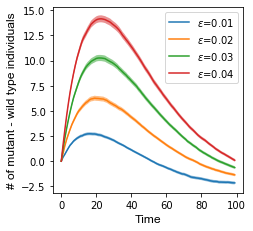

In [84]:
#Calculates the difference in number of survivors between wild type and mutant across the time span 
# - alternative strategy where both mutant and the wildtype uses the same ran value, such that one can 
# calculate a meaningful standard deviation for this difference 
nind = 1000
nrepeats_mut = 1000 #10000

kappa = 0.033
alpha = 0.000222

epsilon = np.array([0.01, 0.02, 0.03, 0.04])
p_wt = np.array([0.03893939, 0.03933673, 0.039742268,0.04015625])

H1_mut_all = np.zeros((4*nrepeats_mut,Tmax))
H1_wt_all = np.zeros((4*nrepeats_mut,Tmax))
diff_mutwt = np.zeros((nrepeats_mut,Tmax))

counter1 = 0
counter2 = 0

C = np.arange(0,Tmax,1,dtype = int)
fig1,ax = plt.subplots(figsize=(6,6))

for m in range(4):
    H1_mut = np.zeros((nrepeats_mut,Tmax),dtype = int)
    H1_wt = np.zeros((nrepeats_mut,Tmax),dtype = int)
    for k in range(nrepeats_mut):
        counter1 = counter1 + 1
        counter2 = counter2 + 1
        s1 = np.ones((Tmax,nind),dtype = int)
        s2 = np.ones((Tmax,nind),dtype = int); 
        for j in range(1,Tmax):
            for i in range(nind):
                ran = np.random.rand(1)
                if s1[j-1,i] == 1:
                    if ran < (1-epsilon[m])*p_wt[m] + alpha*(((1+kappa)**(j+1))-1):
                        s1[j,i] = 0
                if s1[j-1,i] == 0:
                    s1[j,i] = 0
                
                if s2[j-1,i] == 1:
                    if ran < p_wt[m]:
                        s2[j,i] = 0
                if s2[j-1,i] == 0:
                    s2[j,i] = 0
        
        H1_mut[k,:] = np.sum(s1, axis = 1)
        H1_mut_all[counter1-1,:] = np.sum(s1, axis = 1)
    
        H1_wt[k,:] = np.sum(s2, axis = 1)
        H1_wt_all[counter2-1,:] = np.sum(s2, axis = 1)
    
        diff_mutwt[k,:] = H1_mut[k,:] - H1_wt[k,:]
                
    
    #Calculate the difference in number of survivors between wild type and mutant across the time span
    mean_diff = np.mean(diff_mutwt,axis = 0)
    std_diff = np.std(diff_mutwt,axis =0 )
    #mean_mut = np.mean(H1_mut,axis = 0)
    #std_mut = np.std(H1_mut,axis = 0)
    #mean_wt = np.mean(H1_wt,axis = 0)
    #std_wt = np.std(H1_wt,axis = 0)
    #diff_mut_wt = mean_mut - mean_wt
    
    if m==0:
        l1, = ax.plot(C,mean_diff)
        ax.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats_mut), mean_diff+3.0*std_diff/np.sqrt(nrepeats_mut), alpha = 0.5)
        #ax.fill_between(range(Tmax), mean_diff-1.0*std_diff, mean_diff+1.0*std_diff, alpha = 0.5)
    if m==1:
        l2, = ax.plot(C,mean_diff)
        ax.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats_mut), mean_diff+3.0*std_diff/np.sqrt(nrepeats_mut), alpha = 0.5)
        #ax.fill_between(range(Tmax), mean_diff-1.0*std_diff, mean_diff+1.0*std_diff, alpha = 0.5)
    if m==2:
        l3, = ax.plot(C,mean_diff)
        ax.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats_mut), mean_diff+3.0*std_diff/np.sqrt(nrepeats_mut), alpha = 0.5)
        #ax.fill_between(range(Tmax), mean_diff-1.0*std_diff, mean_diff+1.0*std_diff, alpha = 0.5)
    if m==3:
        l4, = ax.plot(C,mean_diff)
        ax.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats_mut), mean_diff+3.0*std_diff/np.sqrt(nrepeats_mut), alpha = 0.5)

ax.legend((l1,l2,l3,l4),('$\epsilon$=0.01', '$\epsilon$=0.02', '$\epsilon$=0.03','$\epsilon$=0.04'));
afont = {'fontname':'Arial'}
ax.set_xlabel("Time",fontsize = 12,**afont);
ax.set_ylabel("# of mutant - wild type individuals",fontsize = 12,**afont);

x_size = 10
plt.rc('xtick',labelsize=x_size)
y_size = 10
plt.rc('ytick',labelsize=y_size)

fig.tight_layout()

figure = plt.gcf()
figure.set_size_inches(3.42, 3.42)
plt.savefig('RA_fig2_Frontinella.pdf', dpi = 600, bbox_inches="tight");

In [358]:
#Calculates the difference in number of survivors between wild type and mutant across the time span 
# by integrating the areas under the survivirship curves where both mutant and the wildtype uses the same ran value, 

from numpy import trapz

nind = 1000
nrepeats_mut =  1000

kappa = 0.033
alpha = 0.000222

epsilon = np.array([0, 0.01, 0.02, 0.03, 0.04])
p_wt = np.array([0.0385499, 0.03893939, 0.03933673, 0.039742268,0.04015625])


area_mut = np.zeros((5,nrepeats_mut))
area_wt = np.zeros((5,nrepeats_mut))
for m in range(5):
    
    H1_mut = np.zeros((nrepeats_mut,Tmax),dtype = int)
    H1_wt = np.zeros((nrepeats_mut,Tmax),dtype = int)
    
    for k in range(nrepeats_mut):
        s1 = np.ones((Tmax,nind),dtype = int)
        s2 = np.ones((Tmax,nind),dtype = int); 
        for j in range(1,Tmax):
            for i in range(nind):
                ran = np.random.rand(1)
                if s1[j-1,i] == 1:
                    if ran < (1-epsilon[m])*p_wt[m] + alpha*(((1+kappa)**(j+1))-1):
                        s1[j,i] = 0
                if s1[j-1,i] == 0:
                    s1[j,i] = 0
                
                if s2[j-1,i] == 1:
                    if ran < p_wt[m]:
                        s2[j,i] = 0
                if s2[j-1,i] == 0:
                    s2[j,i] = 0
        
        H1_mut[k,:] = np.sum(s1, axis = 1)
        y = H1_mut[k,:]
        area_mut[m,k] = trapz(y, dx=1)
        #H1_mut_all[counter1-1,:] = np.sum(s1, axis = 1)
    
        H1_wt[k,:] = np.sum(s2, axis = 1)
        y = H1_wt[k,:]
        area_wt[m,k] = trapz(y, dx=1)
        #H1_wt_all[counter2-1,:] = np.sum(s2, axis = 1)
        
#Calculate the percentage of cases where the mutant has a larger area than the stipulated wild type
Z = np.subtract(area_mut,area_wt)
Y = Z.transpose()
G = np.count_nonzero(Y>0,axis=0)
R = G*100/nrepeats_mut
print('Percentage mutant wins: ',R)
print('Number of mutant winning instances:', np.count_nonzero(Y>0,axis=0))        

Percentage mutant wins:  [  0.   58.   99.2 100.  100. ]
Number of mutant winning instances: [   0  580  992 1000 1000]


1000 repeats:
Percentage mutant wins:  [ 58.   99.5 100.  100. ]
Number of mutant winning instances: [ 580  995 1000 1000]

1000 repeats, includes epsilon = 0:
Percentage mutant wins:  [  0.   58.   99.2 100.  100. ]
Number of mutant winning instances: [   0  580  992 1000 1000]

In [421]:
np.save('H1_wt_all_10000.npy', H1_wt_all)
np.save('H1_mut_all_10000.npy', H1_mut_all)
# .npy extension is added if not given
#d = np.load('test3.npy')
#a == d

# Figure 3

### r and R0 calculations for wild type and mutant

In [4]:
H1_wt_all = np.load('H1_wt_all_1000.npy')
H1_mut_all = np.load('H1_mut_all_1000.npy')

In [5]:
print(H1_wt_all.shape)
print(H1_mut_all.shape)
print(np.shape(H1_wt_all))

(4000, 100)
(4000, 100)
(4000, 100)


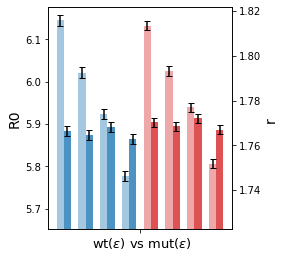

In [83]:
# Calculate r and R0 values for wild type and mutant for the four epsilon values
# Using H1_mut_all and H1_wt_all calculated in the snippet above with nrepeats_mut = 1000 for three different epsilon values

from scipy.optimize import brentq
#Taken from: https://scipython.com/book/chapter-8-scipy/examples/solving-the-euler-lotka-equation/
# The Euler-Lotka equation: find the one real root in r                                                      
def func(r):
    return np.sum(f * np.exp(-r * x)) - 1

Tmax = 100
nind = 1000
nrepeats = 1000 #NB: remember change 
x = np.linspace(1, int(Tmax), 1)
C = np.arange(0,Tmax,1,dtype = int)

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Initializations wild type
nrepeats_wt = nrepeats               
R0_wt_const = np.zeros(4*nrepeats_wt)
r_wt_const = np.zeros(4*nrepeats_wt)

mean_R0_wt_const = np.zeros(4)
std_R0_wt_const = np.zeros(4)
sem_R0_wt_const = np.zeros(4)
mean_r_wt_const = np.zeros(4)
std_r_wt_const = np.zeros(4)
sem_r_wt_const = np.zeros(4)

# Fecundity functions wild type
m_wt_const = np.zeros((4*nrepeats_wt,Tmax))
fert_wt_const = np.zeros((4,Tmax))
counter = 0
for z in range(4):
    fert_wt_const[z,39] = 24.0  #check
    fert_wt_const[z,79] = 24.0 
    for s in range(nrepeats_wt):
        counter = counter + 1
        m_wt_const[counter-1,:] = fert_wt_const[z,:]
        #m_wt_const[s,:] = fert_wt_const[z,:]
f_wt_const = np.multiply(H1_wt_all*(1/nind),m_wt_const)

# Calculate mean, std and sem for R0 and r for wild type
for i in range(4*nrepeats_wt):
    R0_wt_const[i] = np.sum(f_wt_const[i,:])
    
    a, b = -2, 8 
    f = f_wt_const[i,:]
    r = brentq(func, a, b)
    r_wt_const[i] = r
    

# Calculate mean, std and sem for R0 and r for every nrepeats chunk for wildtype (for each epsilon value)
for k in range(4):
    mean_R0_wt_const[k] = np.mean(R0_wt_const[k*nrepeats_wt:k*nrepeats_wt+(nrepeats_wt-1)])
    std_R0_wt_const[k] = np.std(R0_wt_const[k*nrepeats_wt:k*nrepeats_wt+(nrepeats_wt-1)])
    sem_R0_wt_const[k] = np.std(R0_wt_const[k*nrepeats_wt:k*nrepeats_wt+(nrepeats_wt-1)])/math.sqrt(nrepeats_wt)
    mean_r_wt_const[k] = np.mean(r_wt_const[k*nrepeats_wt:k*nrepeats_wt+(nrepeats_wt-1)])
    std_r_wt_const[k] = np.std(r_wt_const[k*nrepeats_wt:k*nrepeats_wt+(nrepeats_wt-1)])
    sem_r_wt_const[k] = np.std(r_wt_const[k*nrepeats_wt:k*nrepeats_wt+(nrepeats_wt-1)])/math.sqrt(nrepeats_wt)


#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Initializations mutant
nrepeats_mut = nrepeats 
R0_mut_const = np.zeros(4*nrepeats_mut)
r_mut_const = np.zeros(4*nrepeats_mut)

mean_R0_mut_const = np.zeros(4)
std_R0_mut_const = np.zeros(4)
sem_R0_mut_const = np.zeros(4)
mean_r_mut_const = np.zeros(4)
std_r_mut_const = np.zeros(4)
sem_r_mut_const = np.zeros(4)

# Fecundity functions mutant
m_mut_const = np.zeros((4*nrepeats_mut,Tmax))
#m_mut_var = np.zeros((3*nrepeats_mut,Tmax))
fert_mut_const = np.zeros((4,Tmax))
counter = 0
for z in range(4):
    fert_mut_const[z,39] = 24.0
    fert_mut_const[z,79] = 18.0 #conservative estimates as varying ageing is not included
    for s in range(nrepeats_mut):
        counter = counter + 1
        m_mut_const[counter-1,:] = fert_mut_const[z,:]
        #m_mut_const[s,:] = fert_mut_const[z,:]
f_mut_const = np.multiply(H1_mut_all*(1/nind),m_mut_const)


# Calculate mean, std and sem for R0 and r for the mutant 
# Calculate R0 and r for all instances
for i in range(4*nrepeats_mut):
    R0_mut_const[i] = np.sum(f_mut_const[i,:])
    
    a, b = -2, 8
    f = f_mut_const[i,:]
    r = brentq(func, a, b)
    r_mut_const[i] = r

# Calculate mean, std and sem for R0 and r for every nrepeats chunk for mutant (for each epsilon value)
for k in range(4):
    mean_R0_mut_const[k] = np.mean(R0_mut_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_R0_mut_const[k] = np.std(R0_mut_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_R0_mut_const[k] = np.std(R0_mut_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)
    mean_r_mut_const[k] = np.mean(r_mut_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_r_mut_const[k] = np.std(r_mut_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_r_mut_const[k] = np.std(r_mut_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)

    
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

#Matplotlib's default ten color circles: {‘C0’, ‘C1’, ‘C2’, ‘C3’, ‘C4’, ‘C5’, ‘C6’, ‘C7’, ‘C8’, ‘C9’}. This is the color used sequentially in matplotlib plots by default.
# https://matplotlib.org/3.1.1/users/dflt_style_changes.html
#https://matplotlib.org/3.3.3/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

    
#Plotting Fig 3
y1_pos = np.array([0,3,6,9])
y2_pos = np.array([1,4,7,10])
y3_pos = np.array([2,5,8,11])

y4_pos = np.array([12,15,18,21])
y5_pos = np.array([13,16,19,22])
y6_pos = np.array([14,17,20])

y7_pos =[11] #[4,12]
dummy_R0 = np.zeros(4)
dummy_r = np.zeros(3)

fig,ax1 = plt.subplots(figsize=(6,6))

ax1.bar(y1_pos,mean_R0_wt_const,width = 1.0,yerr=sem_R0_wt_const, align='center', alpha=0.4, ecolor='black', capsize=3, color = 'C0');
ax1.bar(y2_pos,mean_R0_mut_const,width = 1.0,yerr=sem_R0_mut_const, align='center', alpha=0.8, ecolor='black', capsize=3, color = 'C0');
ax1.bar(y3_pos,dummy_R0,width=0.3,color = 'w') #The width spec does not seem to work. width only refers to the relative width in the slot..

ax1.set_ylabel('R0',fontsize=14);
ax1.set_ylim(0.92*mean_R0_wt_const[0],1.005*mean_R0_wt_const[0])

ax2 = ax1.twinx()

ax2.bar(y4_pos,mean_r_wt_const,width = 1.0,yerr=sem_r_wt_const, align='center', alpha=0.4, ecolor='black', capsize=3,color = 'C3');
ax2.bar(y5_pos,mean_r_mut_const,width = 1.0,yerr=sem_r_mut_const, align='center', alpha=0.8, ecolor='black', capsize=3,color = 'C3');
ax2.bar(y6_pos,dummy_r,width=0.3,color = 'w') 

ax2.set_ylabel('r ',fontsize=14);
ax2.set_ylim(0.95*mean_r_wt_const[0],1.0045*mean_r_wt_const[0])

ax2.set_xticks(y7_pos);
#ax2.set_xticklabels(['$R_0(\epsilon)$: wt vs mut','$r(\epsilon)$: wt vs mut'],fontsize = 12)

xticks = [' wt($\epsilon$) vs mut($\epsilon$)']
ax1.set_xticklabels(xticks, fontsize=13);

fig.tight_layout()

figure = plt.gcf()
figure.set_size_inches(3.42, 3.42)
plt.savefig('RA_fig3_Frontinella.pdf', dpi = 600, bbox_inches="tight");

Tested second egg batch for mutant = 24, like wild type. Results then corresponds to Fig.2, i.e. the reduced second egg batch due to senescence causes that one must up to above 3%.

In [446]:
mean_R0_wt_const

array([6.14440841, 6.02106907, 5.9242042 , 5.77751351])

In [447]:
mean_R0_mut_const

array([5.8847027 , 5.87340541, 5.89321321, 5.86503303])

In [448]:
mean_r_wt_const

array([1.81339788, 1.79309983, 1.77696136, 1.7517732 ])

In [450]:
mean_r_mut_const

array([1.77035572, 1.76843753, 1.77201174, 1.76703573])

## Testing the effect of keeping the same somatic maintenance but letting the mutant have a higher fertility

In [469]:

#Calculates the survivorship curve with the same prod_wt value
nind = 1000
nrepeats_mut = 1000 #10000
Tmax = 100

kappa = 0.033
alpha = 0.000222

prod_wt = 0.0385499 # from the fitting above

H1_mut_all = np.zeros((nrepeats_mut,Tmax))
H1_wt_all = np.zeros((nrepeats_mut,Tmax))
diff_mutwt = np.zeros((nrepeats_mut,Tmax))

counter1 = 0
counter2 = 0

H1_mut = np.zeros((nrepeats_mut,Tmax),dtype = int)
H1_wt = np.zeros((nrepeats_mut,Tmax),dtype = int)
for k in range(nrepeats_mut):
    counter1 = counter1 + 1
    counter2 = counter2 + 1
    s1 = np.ones((Tmax,nind),dtype = int)
    s2 = np.ones((Tmax,nind),dtype = int); 
    for j in range(1,Tmax):
        for i in range(nind):
            ran = np.random.rand(1)
            if s1[j-1,i] == 1:
                if ran < prod_wt + alpha*(((1+kappa)**(j+1))-1):
                    s1[j,i] = 0
            if s1[j-1,i] == 0:
                s1[j,i] = 0

            if s2[j-1,i] == 1:
                if ran < prod_wt:
                    s2[j,i] = 0
            if s2[j-1,i] == 0:
                s2[j,i] = 0

    H1_mut[k,:] = np.sum(s1, axis = 1)
    H1_mut_all[counter1-1,:] = np.sum(s1, axis = 1)

    H1_wt[k,:] = np.sum(s2, axis = 1)
    H1_wt_all[counter2-1,:] = np.sum(s2, axis = 1)

    diff_mutwt[k,:] = H1_mut[k,:] - H1_wt[k,:]
                

In [470]:
np.size(H1_mut_all)

100000

In [457]:
Tmax

100

In [475]:
# Calculate r and R0 values for wild type and mutant when the mutant has enhanced fertility
# Using H1_mut_all and H1_wt_all calculated in the snippet above with nrepeats_mut = 1000 
# The assumption is now that the mutant has the reported female egg clutch sizes and the wild type
# has smaller clutch sizes

#from scipy.optimize import brentq
#Taken from: https://scipython.com/book/chapter-8-scipy/examples/solving-the-euler-lotka-equation/
# The Euler-Lotka equation: find the one real root in r                                                      
def func(r):
    return np.sum(f * np.exp(-r * x)) - 1

Tmax = 100
nind = 1000
nrepeats = 1000 #NB: remember change 
#x = np.linspace(1, int(Tmax), 1)
#C = np.arange(0,Tmax,1,dtype = int)

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Initializations wild type
nrepeats_wt = nrepeats               
R0_wt_const = np.zeros(nrepeats_wt)
r_wt_const = np.zeros(nrepeats_wt)

# Fecundity functions wild type
m_wt_const = np.zeros((nrepeats_wt,Tmax))
fert_wt_const = np.zeros(Tmax)
counter = 0

fert_wt_const[39] = 10.0  #check
fert_wt_const[79] = 10.0 
fert_wildtype = fert_wt_const[39]

for s in range(nrepeats_wt):
    counter = counter + 1
    m_wt_const[counter-1,:] = fert_wt_const[:]
    #m_wt_const[s,:] = fert_wt_const[z,:]
f_wt_const = np.multiply(H1_wt_all*(1/nind),m_wt_const)

# Calculate mean for R0 and r for wild type
for i in range(nrepeats_wt):
    R0_wt_const[i] = np.sum(f_wt_const[i,:])
    
    a, b = -2, 8 
    f = f_wt_const[i,:]
    r = brentq(func, a, b)
    r_wt_const[i] = r
    
    

# Calculate mean, std and sem for R0 and r for wildtype
mean_R0_wt_const = np.mean(R0_wt_const)
mean_r_wt_const = np.mean(r_wt_const)


#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Initializations mutant
nrepeats_mut = nrepeats 
R0_mut_const = np.zeros(nrepeats_mut)
r_mut_const = np.zeros(nrepeats_mut)


# Fecundity functions mutant
m_mut_const = np.zeros((nrepeats_mut,Tmax))
fert_mut_const = np.zeros(Tmax)
counter = 0

fert_mut_const[39] = 12.0
fert_mut_const[79] = 9.0 

for s in range(nrepeats_mut):
    counter = counter + 1
    m_mut_const[counter-1,:] = fert_mut_const[:]
        #m_mut_const[s,:] = fert_mut_const[z,:]
f_mut_const = np.multiply(H1_mut_all*(1/nind),m_mut_const)


# Calculate mean R0 and r for the mutant 
# Calculate R0 and r for all instances
for i in range(nrepeats_mut):
    R0_mut_const[i] = np.sum(f_mut_const[i,:])
    
    a, b = -2, 8
    f = f_mut_const[i,:]
    r = brentq(func, a, b)
    r_mut_const[i] = r

# Calculate mean R0 and r for mutant
mean_R0_mut_const = np.mean(R0_mut_const)
mean_r_mut_const = np.mean(r_mut_const)
    
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

print('Fertility wildtype = ',fert_wildtype, ' mean_R0_wt_const = ', mean_R0_wt_const, ' mean_R0_mut_const = ', mean_R0_mut_const, '% increase mutant = ',100*(mean_R0_mut_const-mean_R0_wt_const)/mean_R0_wt_const)
print('Fertility wildtype = ',fert_wildtype,'mean_r_wt_const = ', mean_r_wt_const, ' mean_r_mut_const = ', mean_r_mut_const, '% increase mutant = ',100*(mean_r_mut_const-mean_r_wt_const)/mean_r_wt_const)

Fertility wildtype =  10.0  mean_R0_wt_const =  2.59765  mean_R0_mut_const =  2.9308680000000003 % increase mutant =  12.827671164321616
Fertility wildtype =  10.0 mean_r_wt_const =  0.9524567504921272  mean_r_mut_const =  1.0732408166802183 % increase mutant =  12.681317668826738


23/24 = 0.958
22/24 = 0.917
21/24 = 0.875
20/24 = 0.833

Fertility wildtype =  23.0  mean_R0_wt_const =  5.974594999999999  mean_R0_mut_const =  5.8617360000000005 % increase mutant =  -1.8889815962420633
Fertility wildtype =  23.0 mean_r_wt_const =  1.7853658734272309  mean_r_mut_const =  1.7663879972401635 % increase mutant =  -1.0629684631888354

Fertility wildtype =  22.0  mean_R0_wt_const =  5.71483  mean_R0_mut_const =  5.8617360000000005 % increase mutant =  2.5706101493832785
Fertility wildtype =  22.0 mean_r_wt_const =  1.7409141108563968  mean_r_mut_const =  1.7663879972401635 % increase mutant =  1.4632477400757857

This implies that the fertility has to increase >6% in the first egg clutch to get a fitness advantage.
Why not this strategy? The energy must be available during the egg clutch production period. May not be enough freed energy due to reduced somatic maintenance to achieve this. Unless it is stored. Connected to maternal care issues? p for survival of 2+18 eggs is low as on average 1 individual will survive.

Probability of female surviving until first reproduction event: p1
Probability of female eggs surviving till reproduction: 1/42 (24+18) 

In [106]:
#(200+30)*24 + 60*18
#48*0.2*24 + 48*0.06*18
24*0.2*24

115.20000000000002

In [108]:
#200*28 + 55*18
#48*0.18*28 + 48*0.056
28*0.18*28

141.12

How many more eggs from the freed energy? Live young: Do come in chunks, have to spare enough for bringing forth a new individual.